In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import json

[nltk_data] Downloading package stopwords to /Users/tommy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import os

import numpy as nrc_py
import pandas as pnl_data
from pandas import *
import sklearn

In [3]:
import random
skipped = random.sample(range(1, 1226258), 1164945)

In [4]:
# Downsize the dataset to the first 50K headlines (~5% samples)
# 1226258 x 0.95 =~ 1164945

In [5]:
print(len(skipped))
print(type(skipped))

1164945
<class 'list'>


In [6]:
def read_data_from_csv(path):

    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pnl_data.read_csv(path, skiprows=[i for i in skipped])
    #column_list = data.columns.values.tolist()
    #column_list.remove('publish_date')
    #print(type(data))
    
    X = data['headline_text'].tolist()
    text = data.headline_text.unique()
    #print(data.headline_text.unique())
    return X, text

In [7]:
data, text = read_data_from_csv("./abcnews-date-text.csv")
#print(X)

In [8]:
data

['barca take record as robson celebrates birthday in',
 'dems hold plebiscite over iraqi conflict',
 'firefighters contain acid spill',
 'injured rios pulls out of buenos aires open',
 'irish man arrested over omagh bombing',
 'most highly educated live in nsw wa',
 'radioactive spill at wmcs olympic dam mine',
 'refshauge wins defamation court case',
 'saudi arabians to stand trial over al qaeda',
 'stations to get fixed home phone service',
 'uni to continue tree disease study',
 'wine chief bounces back from sacking',
 'academic upbeat about higher education review',
 'aec to declare if nt to lose parliamentary seat',
 'brisbane sparkies head for 10 day strike',
 'drought impact may be more far reaching',
 'injuries threaten united finals bid',
 'man to face court over attempted armed robbery',
 'nt govt announces community benefit grants',
 'rain may force aussie bowling change buchanan',
 'stone to stay on as federal liberal president',
 'truck roll destroys furniture',
 'vic govt

In [9]:
text

array(['barca take record as robson celebrates birthday in',
       'dems hold plebiscite over iraqi conflict',
       'firefighters contain acid spill', ...,
       'a timeline of covid 19 in western australia',
       'hurricanes take one run victory over heat bbl',
       'womens shed canberra reskilling unemployed pandemic'],
      dtype=object)

In [10]:
type(data)

list

In [11]:
type(text)

numpy.ndarray

In [12]:
print(len(data))
print(len(text))

61313
60683


In [13]:
"""
data = []
for i in range(50000):
    data.append(X[i])
"""

'\ndata = []\nfor i in range(50000):\n    data.append(X[i])\n'

In [14]:
"""
print(type(text))
print(len(data))
print(len(text))
"""

'\nprint(type(text))\nprint(len(data))\nprint(len(text))\n'

In [15]:
#df1 = pd.DataFrame({'document':data})
df = pnl_data.DataFrame({'document':text})

In [16]:
# removing everything except alphabets`
#df1['clean_doc'] = df1['document'].str.replace("[^a-zA-Z#]", " ")
df['clean_doc'] = df['document'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-16-93c25a97a138>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_doc'] = df['document'].str.replace("[^a-zA-Z#]", " ")


In [17]:
# removing short words
#df1['clean_doc'] = df1['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['clean_doc'] = df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [18]:
df

,document,clean_doc
0,barca take record as robson celebrates birthda...,barca take record robson celebrates birthday
1,dems hold plebiscite over iraqi conflict,dems hold plebiscite over iraqi conflict
2,firefighters contain acid spill,firefighters contain acid spill
3,injured rios pulls out of buenos aires open,injured rios pulls buenos aires open
4,irish man arrested over omagh bombing,irish arrested over omagh bombing
...,...,...
60678,reported us case of covid 19 variant found in ...,reported case covid variant found colorado
60679,where to celebrate new years eve in tasmania,where celebrate years tasmania
60680,a timeline of covid 19 in western australia,timeline covid western australia
60681,hurricanes take one run victory over heat bbl,hurricanes take victory over heat


In [19]:
stop_words = stopwords.words('english')
stop_words.extend(['sa','gns','ua','us','gn','aec','aek', 'ama', 'anz', 'arab', 'nt'])

In [20]:
# tokenization
#tokenized_doc1 = df1['clean_doc'].apply(lambda x: x.split())
tokenized_doc = df['clean_doc'].apply(lambda x: x.split())

In [21]:
tokenized_doc

0        [barca, take, record, robson, celebrates, birt...
1          [dems, hold, plebiscite, over, iraqi, conflict]
2                     [firefighters, contain, acid, spill]
3              [injured, rios, pulls, buenos, aires, open]
4                  [irish, arrested, over, omagh, bombing]
                               ...                        
60678    [reported, case, covid, variant, found, colorado]
60679                  [where, celebrate, years, tasmania]
60680                [timeline, covid, western, australia]
60681              [hurricanes, take, victory, over, heat]
60682    [womens, shed, canberra, reskilling, unemploye...
Name: clean_doc, Length: 60683, dtype: object

In [22]:
# remove stop-words
#tokenized_doc1 = tokenized_doc1.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)

0        [barca, take, record, robson, celebrates, birt...
1                [dems, hold, plebiscite, iraqi, conflict]
2                     [firefighters, contain, acid, spill]
3              [injured, rios, pulls, buenos, aires, open]
4                        [irish, arrested, omagh, bombing]
                               ...                        
60678    [reported, case, covid, variant, found, colorado]
60679                         [celebrate, years, tasmania]
60680                [timeline, covid, western, australia]
60681                    [hurricanes, take, victory, heat]
60682    [womens, shed, canberra, reskilling, unemploye...
Name: clean_doc, Length: 60683, dtype: object


In [23]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)

['barca take record robson celebrates birthday', 'dems hold plebiscite iraqi conflict', 'firefighters contain acid spill', 'injured rios pulls buenos aires open', 'irish arrested omagh bombing', 'highly educated live', 'radioactive spill wmcs olympic mine', 'refshauge wins defamation court case', 'saudi arabians stand trial qaeda', 'stations fixed home phone service', 'continue tree disease study', 'wine chief bounces back sacking', 'academic upbeat higher education review', 'declare lose parliamentary seat', 'brisbane sparkies head strike', 'drought impact reaching', 'injuries threaten united finals', 'face court attempted armed robbery', 'govt announces community benefit grants', 'rain force aussie bowling change buchanan', 'stone stay federal liberal president', 'truck roll destroys furniture', 'govt speaks rice mill closure claims', 'dean receive lifetime parliamentary pension', 'deschamps chases flame marseille', 'fishers meet minister court ruling', 'former socceroos coach thomso

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
# tf-idf (term frequency-inverse document frequency)
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_df = 0.5)
tfidf_matrix = tfidf_vectorizer.fit_transform(detokenized_doc)
tfidf_words = tfidf_vectorizer.get_feature_names()

# bag of words (term frequency)
tf_vectorizer = CountVectorizer(stop_words=stop_words, max_df = 0.5)
tf_matrix = tf_vectorizer.fit_transform(detokenized_doc)
tf_words = tf_vectorizer.get_feature_names()

tfidf_matrix.shape, tf_matrix.shape

((60683, 28443), (60683, 28443))

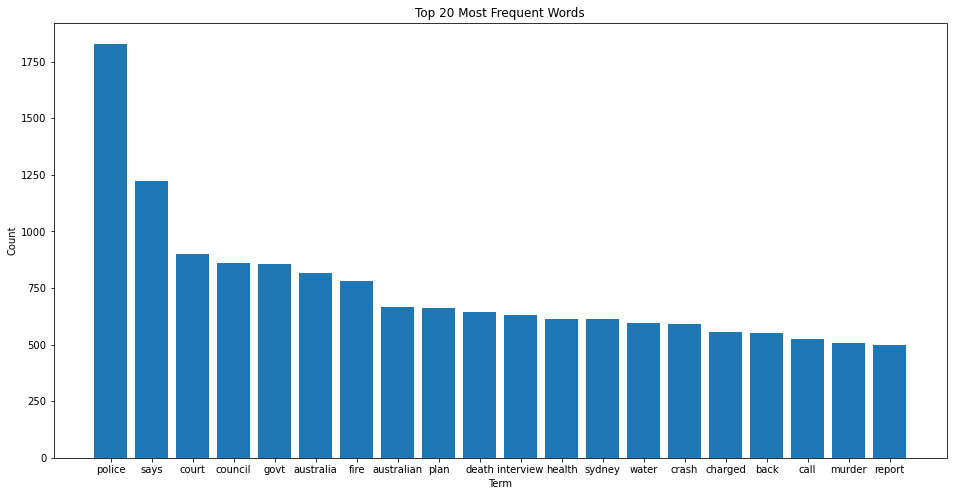

In [26]:
# get word frequencies from the bag of words and sort them by count in descending order
term_frequency = [(term, tf_matrix.sum(axis=0)[0, i]) for term, i in tf_vectorizer.vocabulary_.items()]
term_frequency = sorted(term_frequency, key = lambda x: x[1], reverse=True)
terms = [i[0] for i in term_frequency[:20]] # get top 20 words
count = [i[1] for i in term_frequency[:20]] # get counts of top 20 words

# plot the 20 most frequent words in a bar chart
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(terms)), count)
ax.set_xticks(range(len(terms)))
ax.set_xticklabels(terms)
ax.set_title('Top 20 Most Frequent Words')
ax.set_xlabel('Term')
ax.set_ylabel('Count')
plt.savefig('Top 20 Most Frequent Words.png', dpi=200)
plt.show()

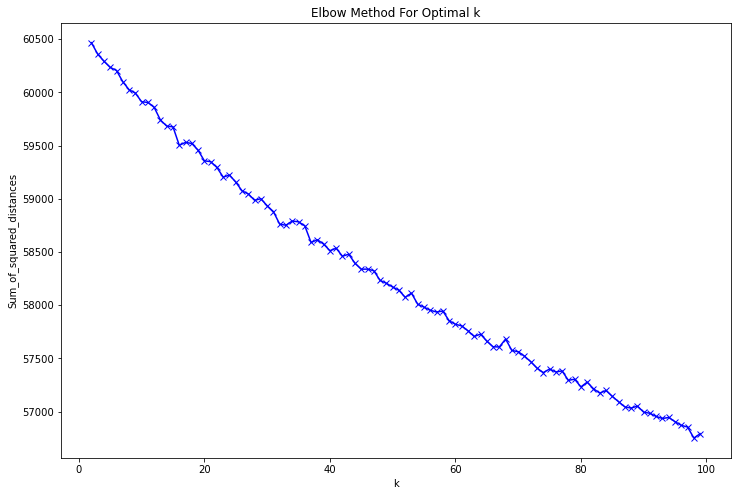

value of K: 
38


In [27]:
Sum_of_squared_distances = []
K = range(2,100)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(tfidf_matrix)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(12,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print('value of K: ')
true_k = int(input())

In [28]:
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model_matrix = model.fit(tfidf_matrix)
model_centroids = model.cluster_centers_.argsort()[:, ::-1]

labels=model.labels_.tolist()
#clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
#print(clusters.sort_values(by=['cluster']))

#for i in range(true_k):
#    print(clusters[clusters['cluster'] == i])

In [29]:
clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
print(clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(clusters[clusters['cluster'] == i])

                                                   title  cluster
0      barca take record as robson celebrates birthda...        0
35860             nicholls hands down austere qld budget        0
35861                                      rfs rain hope        0
35864              tim nicholls delivers 2012 qld budget        0
35866                 central qld shares in budget spend        0
...                                                  ...      ...
33738                      geraldton bolsters china ties       37
16638                                china bans sexy ads       37
57447     us china trade war endangers amazon rainforest       37
5963         taiwanese leader calls for talks with china       37
32244               china sees australia as a soy source       37

[60683 rows x 2 columns]
                                                   title  cluster
0      barca take record as robson celebrates birthda...        0
1               dems hold plebiscite over iraqi co

In [30]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(true_k)
lsa_matrix = lsa.fit_transform(tfidf_matrix)
km_lsa = KMeans(true_k).fit(lsa_matrix) # LSA-based k-means
lsa_labels=km_lsa.labels_.tolist()

In [31]:
lsa_clusters=pnl_data.DataFrame(list(zip(text,lsa_labels)),columns=['title','cluster'])
print(lsa_clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(lsa_clusters[lsa_clusters['cluster'] == i])

                                                   title  cluster
2014               study says child abuse underestimated        0
56248  court order needed for my health record greg h...        0
27118       biographer says gillard a good bet for labor        0
47406  commissioner says new prison could be needed w...        0
52360  world set for hottest year on record again say...        0
...                                                  ...      ...
50402         battery power charging ahead; the world is       37
6336   sea world urged to fund bears facilities in china       37
21911   woman jailed for stealing 650k from commonwealth       37
26013  screwdriver seized after woman stabbed during ...       37
44776           live afl grand final parade in melbourne       37

[60683 rows x 2 columns]
                                                   title  cluster
43         wa opp says police will be taken off the beat        0
51                downer says un must help post wa

In [34]:
def top_words_cluster(model_name, centers):
    ''' prints the top 20 words of each cluster
        from the centroids of the k-means models '''
    print(model_name)
    for i in range(true_k):
        print("Cluster %d: " % i, end="")
        print(" ".join([tfidf_words[c] for c in centers[i, :20]]))
    print()

In [35]:
top_words_cluster(" ---K-M---", model_centroids)

 ---K-M---
Cluster 0: australia australian back health world report south home calls year talks found deal final claims power attack melbourne record test
Cluster 1: coast gold sunshine north west south central ivory cyclone police east found body council titans coffs tourism mine charged rescued
Cluster 2: death jailed toll police inquest years woman driver rises probe penalty bashing murder child investigate coroner former killing guilty suspicious
Cluster 3: killed crash blast accident attack three iraq soldiers four bomb woman soldier afghan dozens five plane truck injured least baghdad
Cluster 4: fire house crews police destroyed threat danger factory damage season total home evacuated govt residents causes school suspicious perth conditions
Cluster 5: support group pledges govt says seeks offers staff changes need thanks government council mayor campaign industry poll life plan nuclear
Cluster 6: aust troops iraq timor market solomons kill send afghan home talks iraqi australian 

In [36]:
top_words_cluster(" ---LSA-KM---", lsa.inverse_transform(km_lsa.cluster_centers_).argsort()[:, ::-1])

 ---LSA-KM---
Cluster 0: says minister labor opposition chief government industry union needed could rise trump china need support group people time wont woman
Cluster 1: report government accused assault climate change school power world help state opposition group child claims abuse market search reveals missing
Cluster 2: missing search woman police continues found government plane help body find back resumes fears jailed accused safe call fisherman water
Cluster 3: election world first home market hospital year rise coronavirus queensland north claims government farmers final test labor australian melbourne report
Cluster 4: interview extended smith james michael john luke andrew matt josh speaks chris simon david nathan peter brett steve scott daniel
Cluster 5: australia south coronavirus india live test pakistan covid highlights news china england blog iraq summary help zealand third face central
Cluster 6: govt urged defends calls local deal funds rejects claims review indigenou

In [37]:
clusters.to_csv('clusters_result.csv', index=False)
lsa_clusters.to_csv('lsa_clusters_result.csv', index=False)

In [ ]:
#https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8
#https://stats.stackexchange.com/questions/87950/distortion-function-for-k-means-algorithm

In [ ]:
#https://nbviewer.org/github/domreichl/blog-post-clustering/blob/master/blog_post_clustering.ipynb